# Logistic Regression : Bank Marketing Dataset

## Importing Data and Data Cleaning

### Importing the dataset

In [1]:
# Import pandas, seaborn, matplotlib, and numpy
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Import the .csv dataset
df = pd.read_csv('bank.csv')

In [2]:
# Getting the information of the dataset
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [3]:
# more information about the dataset
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [4]:
# making the day as object
df['day'] = df['day'].astype(object)

In [5]:
df.describe()

,age,balance,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,3881.000000,63.000000,854.000000,58.000000


### Plotting


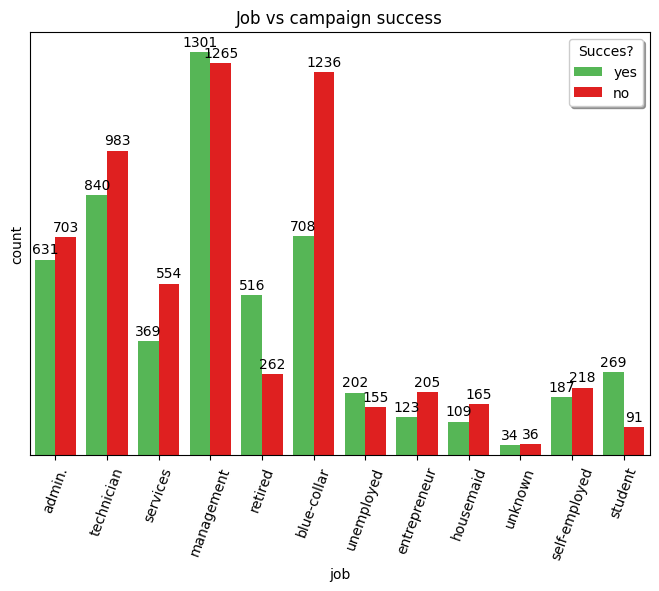

In [6]:
# Setting a color palette for plotting
palette = {'yes':'green', 'no':'red'}
palette = {'yes':'#46C646', 'no':'#FF0000'}

# Plotting to see if the campaign succeed regarding their job
plt.figure(figsize=(8, 5.5));
plt.title('Job vs campaign success')
g = sns.countplot(x= 'job', hue = 'deposit', data=df, palette=palette)
plt.xticks(rotation=70)
plt.yticks([])
plt.legend(title='Succes?', ncol=1, fancybox=True, shadow=True)
for container in g.containers:
    g.bar_label(container, padding = 2)
plt.show()


We can see that customers with job type as 'student' or 'retired' tends to accept the deposit, while 'blue collars' largely refused the deposit.

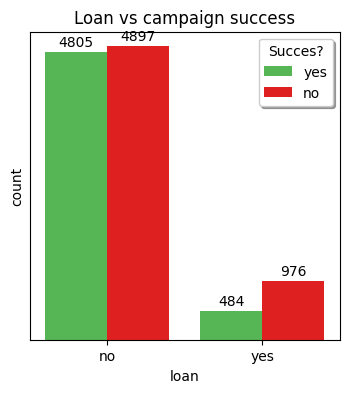

In [7]:
# Plotting to see if the campaign succeed regarding their personal loan
plt.figure(figsize=(4, 4));
plt.title('Loan vs campaign success')
g = sns.countplot(x= 'loan', hue = 'deposit', data=df, palette=palette);
plt.legend(title='Succes?', ncol=1, fancybox=True, shadow=True)
for container in g.containers:
    g.bar_label(container, padding = 2)
plt.yticks([])
plt.show()

Customers with a personal loan tends to refuse the deposit.

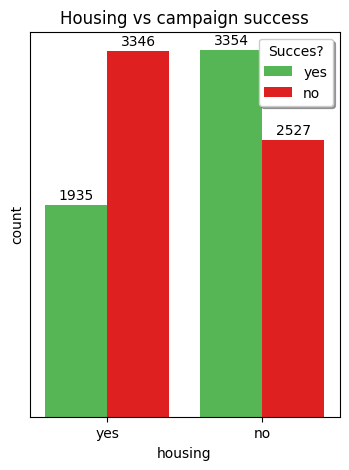

In [8]:
# Plotting to see if the campaign succeed regarding their housing loan
plt.figure(figsize=(4, 5));
plt.title('Housing vs campaign success')
g = sns.countplot(x= 'housing', hue = 'deposit', data=df, palette=palette);
plt.legend(title='Succes?', ncol=1, fancybox=True, shadow=True)
plt.yticks([])
for container in g.containers:
    g.bar_label(container, padding = 2)
plt.show()

Customers without a Housing Loan tends to accept the deposit.

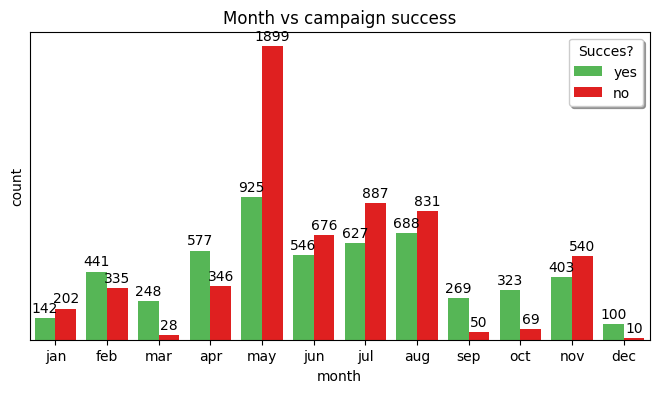

In [9]:
# Plotting to see if the campaign succeed regarding the month of their last deposit
plt.figure(figsize=(8, 4));
plt.title('Month vs campaign success')
g = sns.countplot(x= 'month', hue = 'deposit', data=df, order=['jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec'], palette=palette);
plt.legend(title='Succes?', ncol=1, fancybox=True, shadow=True)
plt.yticks([])
for container in g.containers:
    g.bar_label(container, padding = 2)
plt.show()

Customers tends to accept more the deposit on march, april, september and october.

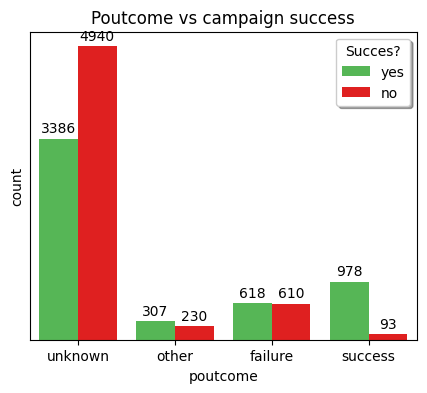

In [10]:
# Plotting to see if the campaign succeed regarding the outcome of the previous campaign.
plt.figure(figsize=(5, 4));
plt.title('Poutcome vs campaign success')
g = sns.countplot(x= 'poutcome', hue = 'deposit', data=df, palette=palette);
plt.legend(title='Succes?', ncol=1, fancybox=True, shadow=True)
plt.yticks([])
for container in g.containers:
    g.bar_label(container, padding = 2)
plt.show()

Customers who previously accepted the deposit tends to accept the deposit by a large margin.

In [11]:
# Making a range of Age: 18-39 = Young Adult, 40-59 = Middle-aged Adult, and 60+ = Old Adult
df['age'] = pd.cut(df['age'], bins=[18, 39, 59, float('Inf')], labels=['18-39', '40-59', '60+'])

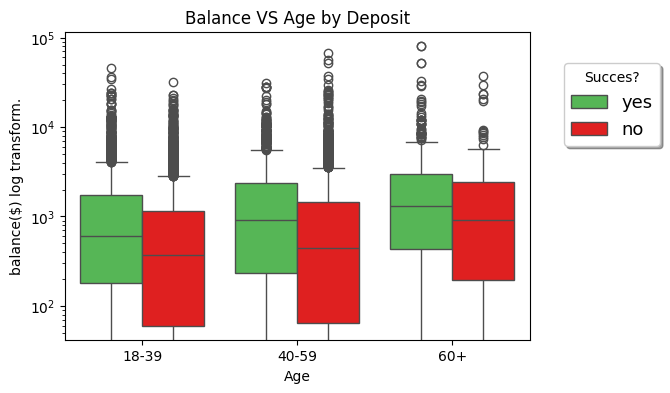

In [12]:
# Plotting to see if the campaign succeed regarding their age or range of age: 18-39 = Young Adult, 40-59 = Middle-aged Adult, and 60+ = Old Adult
plt.figure(figsize=(6,4))
sns.boxplot(x='age', y='balance', hue='deposit', data=df, palette=palette)
plt.ylabel('balance($) log transform.')
plt.xlabel('Age')
plt.title('Balance VS Age by Deposit')
plt.yscale('log')
plt.legend(bbox_to_anchor=(1.3, 0.6), title='Succes?', loc = 'lower right', fontsize=13, fancybox=True, shadow=True, frameon=True)
plt.show()

We can see that older customers tends to have a higher bank balance and that customers who accepted the deposit tended to have a higher balance compared to the customers who refused the deposit.

### Data Cleaning

In [13]:
# Replace all 'yes' and 'no' with 1 and 0
df = df.replace(['yes','no'], [1,0])

C:\Users\merca\AppData\Local\Temp\ipykernel_15712\3960431932.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace(['yes','no'], [1,0])


In [14]:
# How many input values in job
df['job'].value_counts()

job
management       2566
blue-collar      1944
technician       1823
admin.           1334
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
unknown            70
Name: count, dtype: int64

In [15]:
# Encoding the 12 jobs using LabelEncoder
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

df['job'] = label_encoder.fit_transform(df['job'])

In [16]:
# The coverted categorical variable job to numerical
for job, encoded in zip(label_encoder.classes_, range(len(label_encoder.classes_))):
    print(f"{job}: {encoded}")

admin.: 0
blue-collar: 1
entrepreneur: 2
housemaid: 3
management: 4
retired: 5
self-employed: 6
services: 7
student: 8
technician: 9
unemployed: 10
unknown: 11


In [17]:
# How many input values in age range
df['age'].value_counts()

age
18-39    5861
40-59    4513
60+       780
Name: count, dtype: int64

In [18]:
# Label encoding age using .map
df['age'] = df['age'].map({'18-39':0,'40-59':1,'60+':2})

In [19]:
# How many input values in contact
df['contact'].value_counts()

contact
cellular     8042
unknown      2346
telephone     774
Name: count, dtype: int64

In [20]:
# Label encoding contact using .map
df['contact'] = df['contact'].map({'telephone':0,'cellular':1, 'unknown':2})

In [21]:
# There are 12 months. Encoding them from 0 to 11.
df['month'] = df['month'].map({'jan':0,'feb':1,'mar':2,'apr':3,'may':4,'jun':5,'jul':6,'aug':7,'sep':8,'oct':9,'nov':10,'dec':11})

In [22]:
# How many input values in the outcome of the previous campaign
df['poutcome'].value_counts()

poutcome
unknown    8326
failure    1228
success    1071
other       537
Name: count, dtype: int64

In [23]:
# Label encoding poutcome using .map
df['poutcome'] = df['poutcome'].map({'failure':0, 'success':1, 'other':2, 'unknown':3})

In [24]:
# Is there a NaN value?
df.isna().sum()

age          8
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [25]:
# Current dataset
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,1,0,married,secondary,0,2343,1,0,2,5,4,1042,1,-1,0,3,1
1,1,0,married,secondary,0,45,0,0,2,5,4,1467,1,-1,0,3,1
2,1,9,married,secondary,0,1270,1,0,2,5,4,1389,1,-1,0,3,1
3,1,7,married,secondary,0,2476,1,0,2,5,4,579,1,-1,0,3,1
4,1,0,married,tertiary,0,184,0,0,2,5,4,673,2,-1,0,3,1


In [26]:
# We don't need the 'marital', 'education', and 'day'
df = df.drop(['marital', 'education', 'day'], axis=1)

In [27]:
# Updated dataset
df.head()

,age,job,default,balance,housing,loan,contact,month,duration,campaign,pdays,previous,poutcome,deposit
0,1,0,0,2343,1,0,2,4,1042,1,-1,0,3,1
1,1,0,0,45,0,0,2,4,1467,1,-1,0,3,1
2,1,9,0,1270,1,0,2,4,1389,1,-1,0,3,1
3,1,7,0,2476,1,0,2,4,579,1,-1,0,3,1
4,1,0,0,184,0,0,2,4,673,2,-1,0,3,1


### Getting Inputs and Outputs

Assigning X and y

In [28]:
X = df.iloc[:,:-1].values
X

C:\Users\merca\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\pandas\core\arrays\base.py:568: RuntimeWarning: invalid value encountered in cast
  result = np.asarray(self, dtype=dtype)


array([[  1,   0,   0, ...,  -1,   0,   3],
       [  1,   0,   0, ...,  -1,   0,   3],
       [  1,   9,   0, ...,  -1,   0,   3],
       ...,
       [  0,   9,   0, ...,  -1,   0,   3],
       [  1,   9,   0, ..., 172,   5,   0],
       [  0,   9,   0, ...,  -1,   0,   3]])

In [29]:
y = df.iloc[:,-1].values
y

array([1, 1, 1, ..., 0, 0, 0])

### Training Set and Test Set

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [31]:
X_train

array([[  0,   8,   0, ..., 200,   3,   0],
       [  0,   4,   0, ...,  -1,   0,   3],
       [  1,  10,   0, ...,  91,   1,   1],
       ...,
       [  0,   9,   0, ...,  -1,   0,   3],
       [  1,   5,   0, ...,  -1,   0,   3],
       [  0,   4,   0, ...,  -1,   0,   3]])

In [32]:
X_test

array([[  2,   5,   0, ...,  -1,   0,   3],
       [  0,   1,   0, ...,  -1,   0,   3],
       [  0,   1,   0, ..., 300,   1,   0],
       ...,
       [  1,   9,   0, ..., 328,   1,   0],
       [  1,  10,   0, ..., 178,  10,   1],
       [  0,   0,   0, ..., 521,   2,   0]])

In [33]:
y_train

array([1, 0, 1, ..., 0, 1, 0])

In [34]:
y_test

array([0, 1, 1, ..., 0, 1, 0])

### Standard Scaling

In [35]:
from sklearn.preprocessing import StandardScaler 
sc = StandardScaler()
X_train = sc.fit_transform(X_train)

In [36]:
X_train

array([[ 0.02117024,  1.09433902, -0.12296548, ...,  1.37403675,
         0.99172215, -2.33256177],
       [ 0.02117024, -0.15089522, -0.12296548, ..., -0.47620856,
        -0.36760146,  0.54018913],
       [ 0.02117024,  1.71695614, -0.12296548, ...,  0.37066989,
         0.08550641, -1.37497814],
       ...,
       [ 0.02117024,  1.40564758, -0.12296548, ..., -0.47620856,
        -0.36760146,  0.54018913],
       [ 0.02117024,  0.16041334, -0.12296548, ..., -0.47620856,
        -0.36760146,  0.54018913],
       [ 0.02117024, -0.15089522, -0.12296548, ..., -0.47620856,
        -0.36760146,  0.54018913]])

### Building the Model

In [37]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state = 0)

### Training the Model

In [38]:
model.fit(X_train, y_train)

LogisticRegression(random_state=0)

### Inference

In [39]:
y_pred = model.predict(sc.transform(X_test))
y_pred

array([0, 1, 1, ..., 0, 1, 0])

In [40]:
y_test

array([0, 1, 1, ..., 0, 1, 0])

### Prediction of a Data

In [49]:
df.iloc[0]

age            1
job            0
default        0
balance     2343
housing        1
loan           0
contact        2
month          4
duration    1042
campaign       1
pdays         -1
previous       0
poutcome       3
deposit        1
Name: 0, dtype: int64

In [46]:
model.predict(sc.transform([[1,0,0,2343,1,0,2,4,1042,1,-1,0,3]]))

array([1])

## Evaluation

### Confusion Matrix

In [43]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[950, 216],
       [274, 793]])

### Accuracy

In [44]:
(950+793)/(950+793+274+216)

0.780564263322884

In [45]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.780564263322884